In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
DATASET_DIR = "D:/Krish_AI_projects/_2DClassification_CNN/Data"

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
SEED = 42

In [5]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split = 0.2,
    subset="training",
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    seed = SEED
)

Found 885 files belonging to 6 classes.
Using 708 files for training.


In [7]:
class_names = train_dataset.class_names
num_classes = len(class_names)

In [8]:
class_names

['Bird-drop',
 'Clean',
 'Dusty',
 'Electrical-damage',
 'Physical-Damage',
 'Snow-Covered']

In [9]:
num_classes

6

## Base Model (CNN2D)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(1.0/255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# Convolution layer: 1
model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Convolution layer: 2
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Convolution layer: 3
model.add(tf.keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Flattening
model.add(tf.keras.layers.Flatten())

# FCL
model.add(tf.keras.layers.Dense(128, activation="relu"))

# Output layer
model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

d:\Krish_AI_projects\Classification_CNN_2D\.venv\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
EPOCHS = 10

In [14]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2825 - loss: 2.4697 - val_accuracy: 0.4463 - val_loss: 1.5425
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 700ms/step - accuracy: 0.4195 - loss: 1.4725 - val_accuracy: 0.4520 - val_loss: 1.4066
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 710ms/step - accuracy: 0.5890 - loss: 1.1732 - val_accuracy: 0.5480 - val_loss: 1.2144
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 705ms/step - accuracy: 0.7062 - loss: 0.8707 - val_accuracy: 0.6158 - val_loss: 1.1720
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 699ms/step - accuracy: 0.8178 - loss: 0.5980 - val_accuracy: 0.4407 - val_loss: 1.8811
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 707ms/step - accuracy: 0.8291 - loss: 0.5290 - val_accuracy: 0.6441 - val_loss: 1.3047
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 702ms/step - accuracy: 0.9308 - loss: 0.2464 - val_accuracy: 0.5763 - val_loss: 1.5925
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 722ms/step - accuracy: 0.9675 - loss: 0.1274 - val_accurac

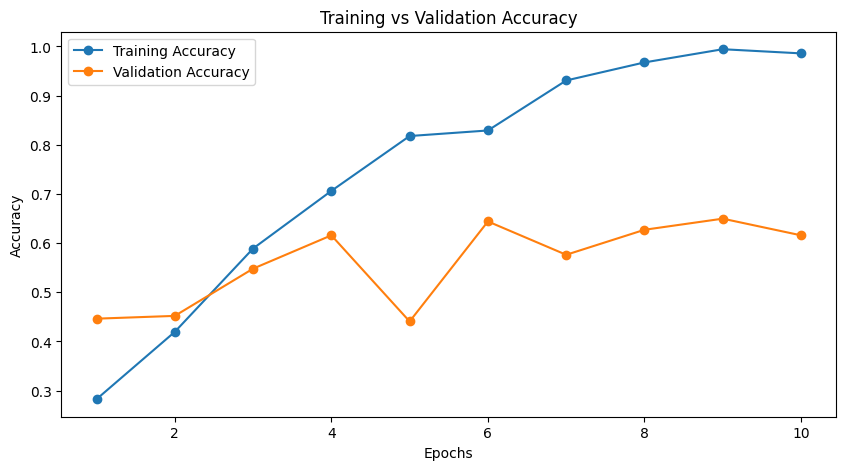

In [15]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, EPOCHS + 1)

plt.figure(figsize= (10,5))
plt.plot(epochs, train_accuracy, label = 'Training Accuracy', marker = 'o')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy', marker = 'o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
EPOCHS = 20

history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 706ms/step - accuracy: 0.9929 - loss: 0.0516 - val_accuracy: 0.6215 - val_loss: 1.6352
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 692ms/step - accuracy: 0.9915 - loss: 0.0537 - val_accuracy: 0.6102 - val_loss: 1.8665
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 735ms/step - accuracy: 0.9958 - loss: 0.0390 - val_accuracy: 0.6215 - val_loss: 1.7353
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 764ms/step - accuracy: 0.9929 - loss: 0.0381 - val_accuracy: 0.6497 - val_loss: 1.7349
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 758ms/step - accuracy: 0.9972 - loss: 0.0436 - val_accuracy: 0.6610 - val_loss: 1.6352
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 780ms/step - accuracy: 0.9958 - loss: 0.0322 - val_accuracy: 0.6441 - val_loss: 1.8155
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 730ms/step - accuracy: 0.9929 - loss: 0.0552 - val_accuracy: 0.6441 - val_loss: 1.5946
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 732ms/step - accuracy: 0.9944 - loss: 0.0282 - val_accu

## Solve the Overfitting problem

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [18]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch,lr):
  if epoch > 5:
    return lr*0.1
  return lr

lr_schedule = LearningRateScheduler(scheduler)

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(1.0/255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# Convolution layer: 1
model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.3))

# Convolution layer: 2
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.3))

# Convolution layer: 3
model.add(tf.keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.3))

# Flattening
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

# FCL
model.add(tf.keras.layers.Dense(128, activation="relu"))

# Output layer
model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

In [20]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [21]:
EPOCHS = 10

In [22]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2782 - loss: 14.8061 - val_accuracy: 0.2316 - val_loss: 12.4419
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4266 - loss: 1.6274 - val_accuracy: 0.0904 - val_loss: 43.8764
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5028 - loss: 1.3668 - val_accuracy: 0.0904 - val_loss: 54.3141
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5636 - loss: 1.2062 - val_accuracy: 0.0904 - val_loss: 57.1543
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6130 - loss: 1.1004 - val_accuracy: 0.0904 - val_loss: 52.8507
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6186 - loss: 1.0034 - val_accuracy: 0.2599 - val_loss: 18.8972
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6907 - loss: 0.8348 - val_accuracy: 0.1186 - val_loss: 18.0631
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.7006 - loss: 0.7545 - val_accuracy: 0.1243 - v

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import (
    RandomFlip, RandomRotation, RandomZoom,
    Rescaling, Conv2D, BatchNormalization, MaxPooling2D,
    Flatten, Dropout, Dense, GlobalAveragePooling2D
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [24]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.15),
    RandomZoom(0.15),
    # Optional: add RandomContrast(0.2) if colors vary a lot
])

## Grok.com's recommendation

In [25]:


# -------------------------------
# Data Augmentation (Critical fix)
# -------------------------------


# -------------------------------
# Build the Model
# -------------------------------
model = tf.keras.models.Sequential()

# Input + Augmentation + Rescaling
model.add(data_augmentation)
model.add(Rescaling(1.0/255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# Conv Block 1
model.add(Conv2D(32, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation="relu", padding="same"))  # Extra layer for better features
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.35))

# Classifier
model.add(Flatten())
# Alternative (often better): use GlobalAveragePooling2D() instead of Flatten()
# model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation="softmax"))

# -------------------------------
# Compile with lower initial LR
# -------------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),  # Reduced from default 1e-3
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# -------------------------------
# Callbacks
# -------------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,           # More patient now that we have augmentation
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,           # Halve LR when plateau
    patience=3,
    min_lr=1e-7,
    verbose=1
)

callbacks = [early_stopping, reduce_lr]

# -------------------------------
# Train the model
# -------------------------------
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=50,  # Allow more epochs since early stopping will protect us
    callbacks=callbacks,
    verbose=1
)

# Optional: Print final results
print("\nTraining complete!")
print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.2853 - loss: 3.1489 - val_accuracy: 0.1130 - val_loss: 3.7126 - learning_rate: 3.0000e-04
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.3898 - loss: 2.6926 - val_accuracy: 0.1130 - val_loss: 4.9866 - learning_rate: 3.0000e-04
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.4435 - loss: 2.6330 - val_accuracy: 0.1130 - val_loss: 8.1575 - learning_rate: 3.0000e-04
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5054 - loss: 2.3940
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
23/23 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.4929 - loss: 2.3745 - val_accuracy: 0.1130 - val_loss: 7.4262 - learning_rate: 3.0000e-04
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.5056 - loss: 2.3163 - val_accuracy: 0.1186 - val_loss: 6.7215 - learning_rate: 1.5000e-04
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.4958 - loss: 2.338

## Insights so far

## Transfer Learning - MobileNetV2

In [26]:
#MobileNetV2 base model

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
base_model.trainable = False

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(224,224,3)))
model.add(data_augmentation)
model.add(tf.keras.layers.Rescaling(1.0/255))

model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [30]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 648ms/step - accuracy: 0.4901 - loss: 1.3316 - val_accuracy: 0.4859 - val_loss: 1.2077
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 590ms/step - accuracy: 0.6723 - loss: 0.9087 - val_accuracy: 0.6667 - val_loss: 0.9143
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 600ms/step - accuracy: 0.7147 - loss: 0.7731 - val_accuracy: 0.6667 - val_loss: 0.9306
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 595ms/step - accuracy: 0.7669 - loss: 0.6765 - val_accuracy: 0.6441 - val_loss: 1.0478
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 634ms/step - accuracy: 0.7938 - loss: 0.5990 - val_accuracy: 0.6667 - val_loss: 0.8514
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 642ms/step - accuracy: 0.7853 - loss: 0.6014 - val_accuracy: 0.6384 - val_loss: 0.9951
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 598ms/step - accuracy: 0.8376 - loss: 0.4906 - val_accuracy: 0.6723 - val_loss: 0.8476
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 626ms/step - accuracy: 0.8051 - loss: 0.5525 - val_accu

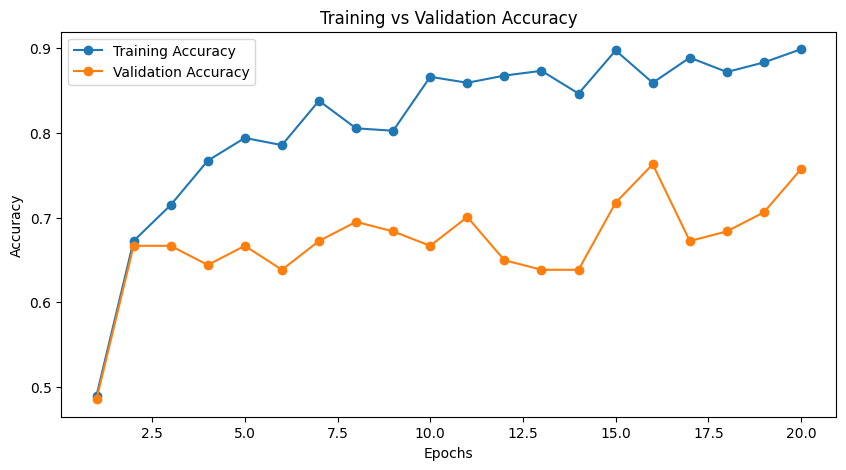

In [31]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, 21)

plt.figure(figsize= (10,5))
plt.plot(epochs, train_accuracy, label = 'Training Accuracy', marker = 'o')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy', marker = 'o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
model.save('D:/Krish_AI_projects/Classification_CNN_2D/mobilenetv2_2.h5')

In [36]:
model.save('D:/Krish_AI_projects/Classification_CNN_2D/mobilenetv2_2.keras')

## EfficientNet

In [37]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input

In [38]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split = 0.2,
    subset="training",
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    seed = SEED
)

Found 885 files belonging to 6 classes.
Using 708 files for training.


In [39]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split = 0.2,
    subset="validation",
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    seed = SEED
)

Found 885 files belonging to 6 classes.
Using 177 files for validation.


In [40]:
class_names = train_dataset.class_names

In [41]:
class_names

['Bird-drop',
 'Clean',
 'Dusty',
 'Electrical-damage',
 'Physical-Damage',
 'Snow-Covered']

In [42]:
num_classes = len(class_names)

In [43]:
num_classes

6

In [44]:
class_counts = {}
total_images = 0

for class_name in class_names:
  class_path = os.path.join(DATASET_DIR, class_name)
  count = len(os.listdir(class_path))
  class_counts[class_name] = count
  total_images += count

In [45]:
class_weights = {}

for index, class_name in enumerate(class_names):
  class_weights[index] = total_images / (num_classes * class_counts[class_name])

print("Class weights", class_weights)

Class weights {0: 0.7530224525043178, 1: 0.7491408934707904, 2: 0.7649122807017544, 3: 1.4110032362459546, 4: 2.106280193236715, 5: 1.1815718157181572}


In [46]:
data_augmentation = tf.keras.Sequential()
data_augmentation.add(tf.keras.layers.RandomFlip("horizontal"))
data_augmentation.add(tf.keras.layers.RandomRotation(0.1))
data_augmentation.add(tf.keras.layers.RandomZoom(0.1))

In [47]:
train_images = []
train_labels = []

In [48]:
for images, labels in train_dataset:
  images = preprocess_input(images)
  train_images.append(images)
  train_labels.append(labels)

In [49]:
train_images = tf.concat(train_images, axis=0)
train_labels = tf.concat(train_labels, axis=0)

In [50]:
validation_images = []
validation_labels = []

In [51]:
for images, labels in validation_dataset:
  images = preprocess_input(images)
  validation_images.append(images)
  validation_labels.append(labels)

In [52]:
validation_images = tf.concat(validation_images, axis=0)
validation_labels = tf.concat(validation_labels, axis=0)

In [53]:
base_model = tf.keras.applications.EfficientNetB0(
    input_shape = (224,224,3),
    include_top = False,
    weights="imagenet"
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [54]:
base_model.trainable = False

In [55]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(224,224,3)))
model.add(data_augmentation)

model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [56]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,214,313 (16.08 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [58]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 15
)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 861ms/step - accuracy: 0.5353 - loss: 1.2448 - val_accuracy: 0.6610 - val_loss: 0.9043
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 762ms/step - accuracy: 0.7500 - loss: 0.7227 - val_accuracy: 0.7458 - val_loss: 0.7219
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 750ms/step - accuracy: 0.8023 - loss: 0.5612 - val_accuracy: 0.7401 - val_loss: 0.7270
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 737ms/step - accuracy: 0.8249 - loss: 0.5079 - val_accuracy: 0.7740 - val_loss: 0.6261
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 736ms/step - accuracy: 0.8517 - loss: 0.4496 - val_accuracy: 0.7571 - val_loss: 0.6781
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 735ms/step - accuracy: 0.8912 - loss: 0.3630 - val_accuracy: 0.7910 - val_loss: 0.5703
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 744ms/step - accuracy: 0.8842 - loss: 0.3429 - val_accuracy: 0.7910 - val_loss: 0.6161
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 734ms/step - accuracy: 0.9096 - loss: 0.2817 - val_accu

## Hyper Parameter Optimization

In [60]:
!pip install keras-tuner  # Run if not installed

import keras_tuner as kt
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Reuse your train_dataset and validation_dataset (with preprocess_input already applied)
# Make sure they are defined as in your original code

def build_model(hp):
    base_model = EfficientNetB0(
        input_shape=(224, 224, 3),
        include_top=False,
        weights="imagenet"
    )
    base_model.trainable = False

    model = Sequential([
        RandomFlip("horizontal"),
        RandomRotation(hp.Float("rotation_factor", min_value=0.05, max_value=0.3, step=0.05)),
        RandomZoom(hp.Float("zoom_factor", min_value=0.05, max_value=0.3, step=0.05)),
        base_model,
        GlobalAveragePooling2D(),
        Dropout(hp.Float("dropout_rate", min_value=0.0, max_value=0.5, step=0.1)),
        Dense(
            hp.Int("dense_units", min_value=64, max_value=512, step=64),
            activation='relu'
        ),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Setup Random Search Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,          # Same as n_iter before
    executions_per_trial=1,
    directory='kt_dir',
    project_name='efficientnet_tune',
    overwrite=True
)

# Optional: Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Run the search
tuner.search(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[early_stopping],
    class_weight=class_weights  # Handles imbalance
)

# Results
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(best_hps.values)

best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate on validation
val_loss, val_acc = best_model.evaluate(validation_dataset)
print(f"Best validation accuracy: {val_acc:.4f}")

Trial 20 Complete [00h 04m 49s]
val_accuracy: 0.7966101765632629

Best val_accuracy So Far: 0.8135592937469482
Total elapsed time: 01h 41m 49s
Best hyperparameters:
{'rotation_factor': 0.15000000000000002, 'zoom_factor': 0.2, 'dropout_rate': 0.2, 'dense_units': 512, 'learning_rate': 0.0005275332628165129}


d:\Krish_AI_projects\Classification_CNN_2D\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 496ms/step - accuracy: 0.8136 - loss: 0.5911
Best validation accuracy: 0.8136


In [61]:
#best_model.save('/content/drive/MyDrive/Krish AI/Solar Panel Classification/trained_effnet_finetune.h5')
best_model.save('D:/Krish_AI_projects/Classification_CNN_2D/trained_effnet_finetune.keras')
best_model.save('D:/Krish_AI_projects/Classification_CNN_2D/trained_effnet_finetune.h5')